<a href="https://colab.research.google.com/github/Macostik/ML_cource/blob/main/HomeWork17/forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

## Load data


In [5]:
# Load data
data = pd.read_csv('/content/T10Y2Y.csv', na_values='.')

## Data Pre-Processing

In [6]:
# Convert data
data['DATE'] = pd.to_datetime(data['DATE'])

# Remove emtpy data
data = data.dropna(axis=0, how='any', )

# Convert to float
data['T10Y2Y'] = data['T10Y2Y'].astype(float)

# Rename columns
data.rename(columns={'DATE': 'ds', 'T10Y2Y': 'y'}, inplace=True)

# Get info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1252 non-null   datetime64[ns]
 1   y       1252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.3 KB


<ipython-input-6-5a9c45e86b18>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['T10Y2Y'] = data['T10Y2Y'].astype(float)
<ipython-input-6-5a9c45e86b18>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'DATE': 'ds', 'T10Y2Y': 'y'}, inplace=True)


In [7]:
# Visualize dataframe
data.head()

,ds,y
0,2019-07-18,0.27
1,2019-07-19,0.25
2,2019-07-22,0.25
3,2019-07-23,0.25
4,2019-07-24,0.22


## Visualize, visualize, visualize ...

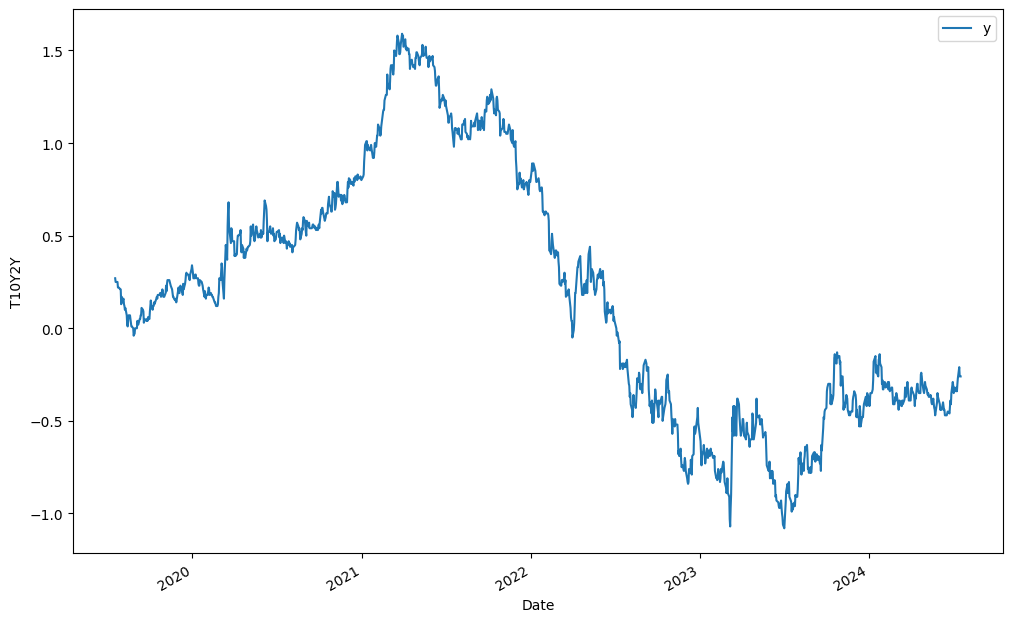

In [8]:
# Plot dataframe
ax = data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('T10Y2Y')
ax.set_xlabel('Date')

plt.show()

In [9]:
# Let's see how to change target depending on time
data['lag1'] = data['y'].shift(1)
data['lag2'] = data['y'].shift(2)
data['rolling_mean'] = data['y'].rolling(window=3).mean()
data['rolling_std'] = data['y'].rolling(window=3).std()
data['frequency'] = np.fft.fftfreq(len(data['y']))
data['amplitude'] = np.abs(np.fft.fft(data['y']))
data = data.dropna(axis=0, how='any', )
data.head()

,ds,y,lag1,lag2,rolling_mean,rolling_std,frequency,amplitude
2,2019-07-22,0.25,0.25,0.27,0.256667,0.011547,0.001597,160.564453
3,2019-07-23,0.25,0.25,0.25,0.250000,0.000000,0.002396,47.104744
4,2019-07-24,0.22,0.25,0.25,0.240000,0.017321,0.003195,50.442971
5,2019-07-25,0.22,0.22,0.25,0.230000,0.017321,0.003994,21.631945
6,2019-07-26,0.22,0.22,0.22,0.220000,0.000000,0.004792,29.833154


## Train Model

In [10]:
# Create model
model = Prophet(yearly_seasonality=False, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01)

# Train model
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v2icvkg/0f36qhjx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v2icvkg/djjmvgqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74466', 'data', 'file=/tmp/tmp6v2icvkg/0f36qhjx.json', 'init=/tmp/tmp6v2icvkg/djjmvgqg.json', 'output', 'file=/tmp/tmp6v2icvkg/prophet_modelgv97q9es/prophet_model-20241229172252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:22:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Validate data

In [13]:
# Cross validation
data_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

# Calculate errors
mae = mean_absolute_error(data_cv['y'], data_cv['yhat'])
mse = mean_squared_error(data_cv['y'], data_cv['yhat'])
rmse = root_mean_squared_error(data_cv['y'], data_cv['yhat'])

print(f'-------------------------------')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'-------------------------------')

INFO:prophet:Making 5 forecasts with cutoffs between 2021-07-29 00:00:00 and 2023-07-19 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v2icvkg/o_onckt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v2icvkg/oiprm9d5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28959', 'data', 'file=/tmp/tmp6v2icvkg/o_onckt8.json', 'init=/tmp/tmp6v2icvkg/oiprm9d5.json', 'output', 'file=/tmp/tmp6v2icvkg/prophet_modelkh4a151q/prophet_model-20241229173332.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:33:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v2icvkg/qfywrbzm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6v2icvkg/g4a6p8yn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

-------------------------------
Mean Absolute Error: 0.54
Mean Squared Error: 0.47
Root Mean Squared Error: 0.69
-------------------------------


## Prediction data

In [11]:
# Dataframe extends into the future a specified number of days
future = model.make_future_dataframe(periods=30, freq='D')

# Predict
forecast = model.predict(future)

# Assign each row in future a predicted value which it names "yhat"
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1275,2024-08-13,-0.184075,-0.331824,-0.051362
1276,2024-08-14,-0.182815,-0.333135,-0.039230
1277,2024-08-15,-0.181555,-0.324869,-0.039348
1278,2024-08-16,-0.180295,-0.336570,-0.025460
1279,2024-08-17,-0.179035,-0.326749,-0.035713


## Visualize prediction

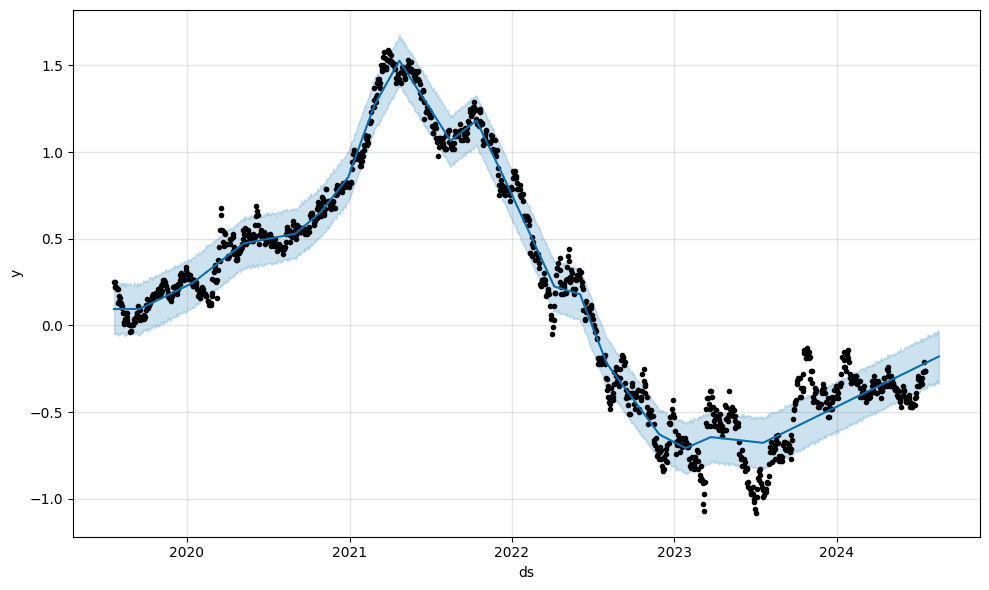

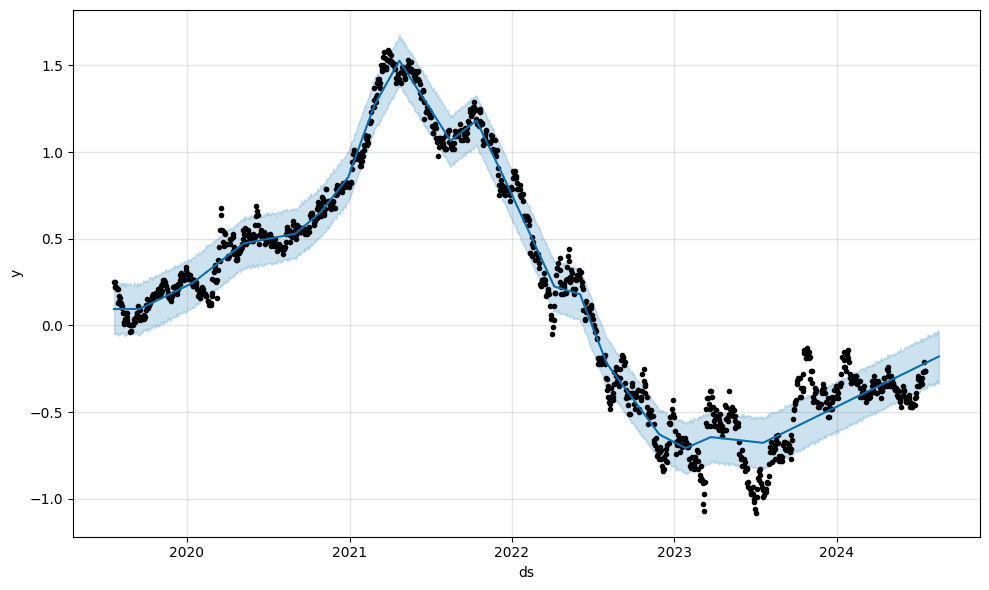

In [21]:
model.plot(forecast, uncertainty=True)

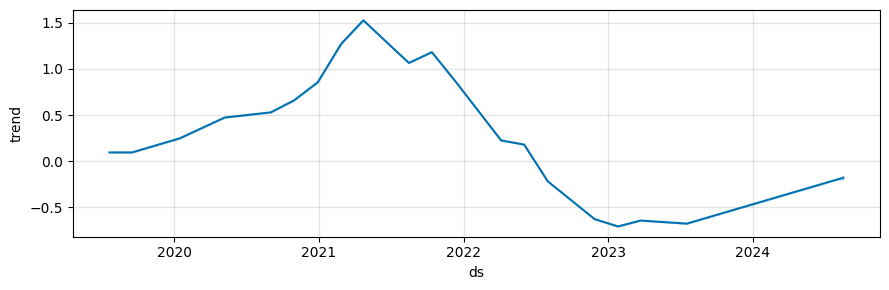

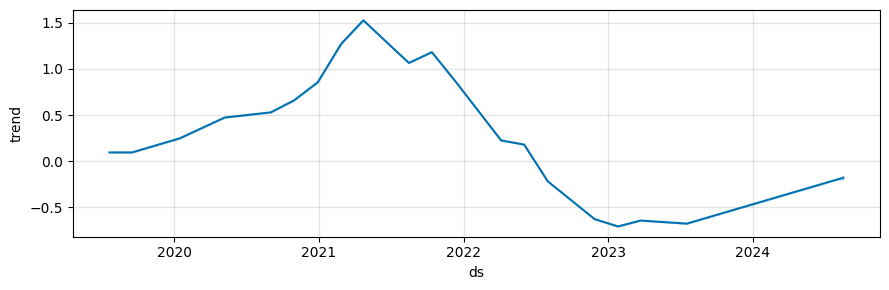

In [22]:
model.plot_components(forecast)

## Conclusion: